In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,25)

from skimage.filters import threshold_local, try_all_threshold, threshold_isodata
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from skimage.restoration import denoise_tv_bregman, denoise_nl_means
import imageio

In [7]:
def LoadRGBchannels( fname ):
    data = imageio.imread( fname )
    r = data[:,:,0]
    g = data[:,:,1]
    b = data[:,:,2]
    return r,g,b

def IsoBlue( r,g,b ):
    ag = b/(g+1.0)>1.5
    ab = b/(r+1.0)>1.5
    isoblue = ag*ab
    return isoblue

In [11]:
img_cus = IsoBlue(*LoadRGBchannels('../CV/test1.jpg'))

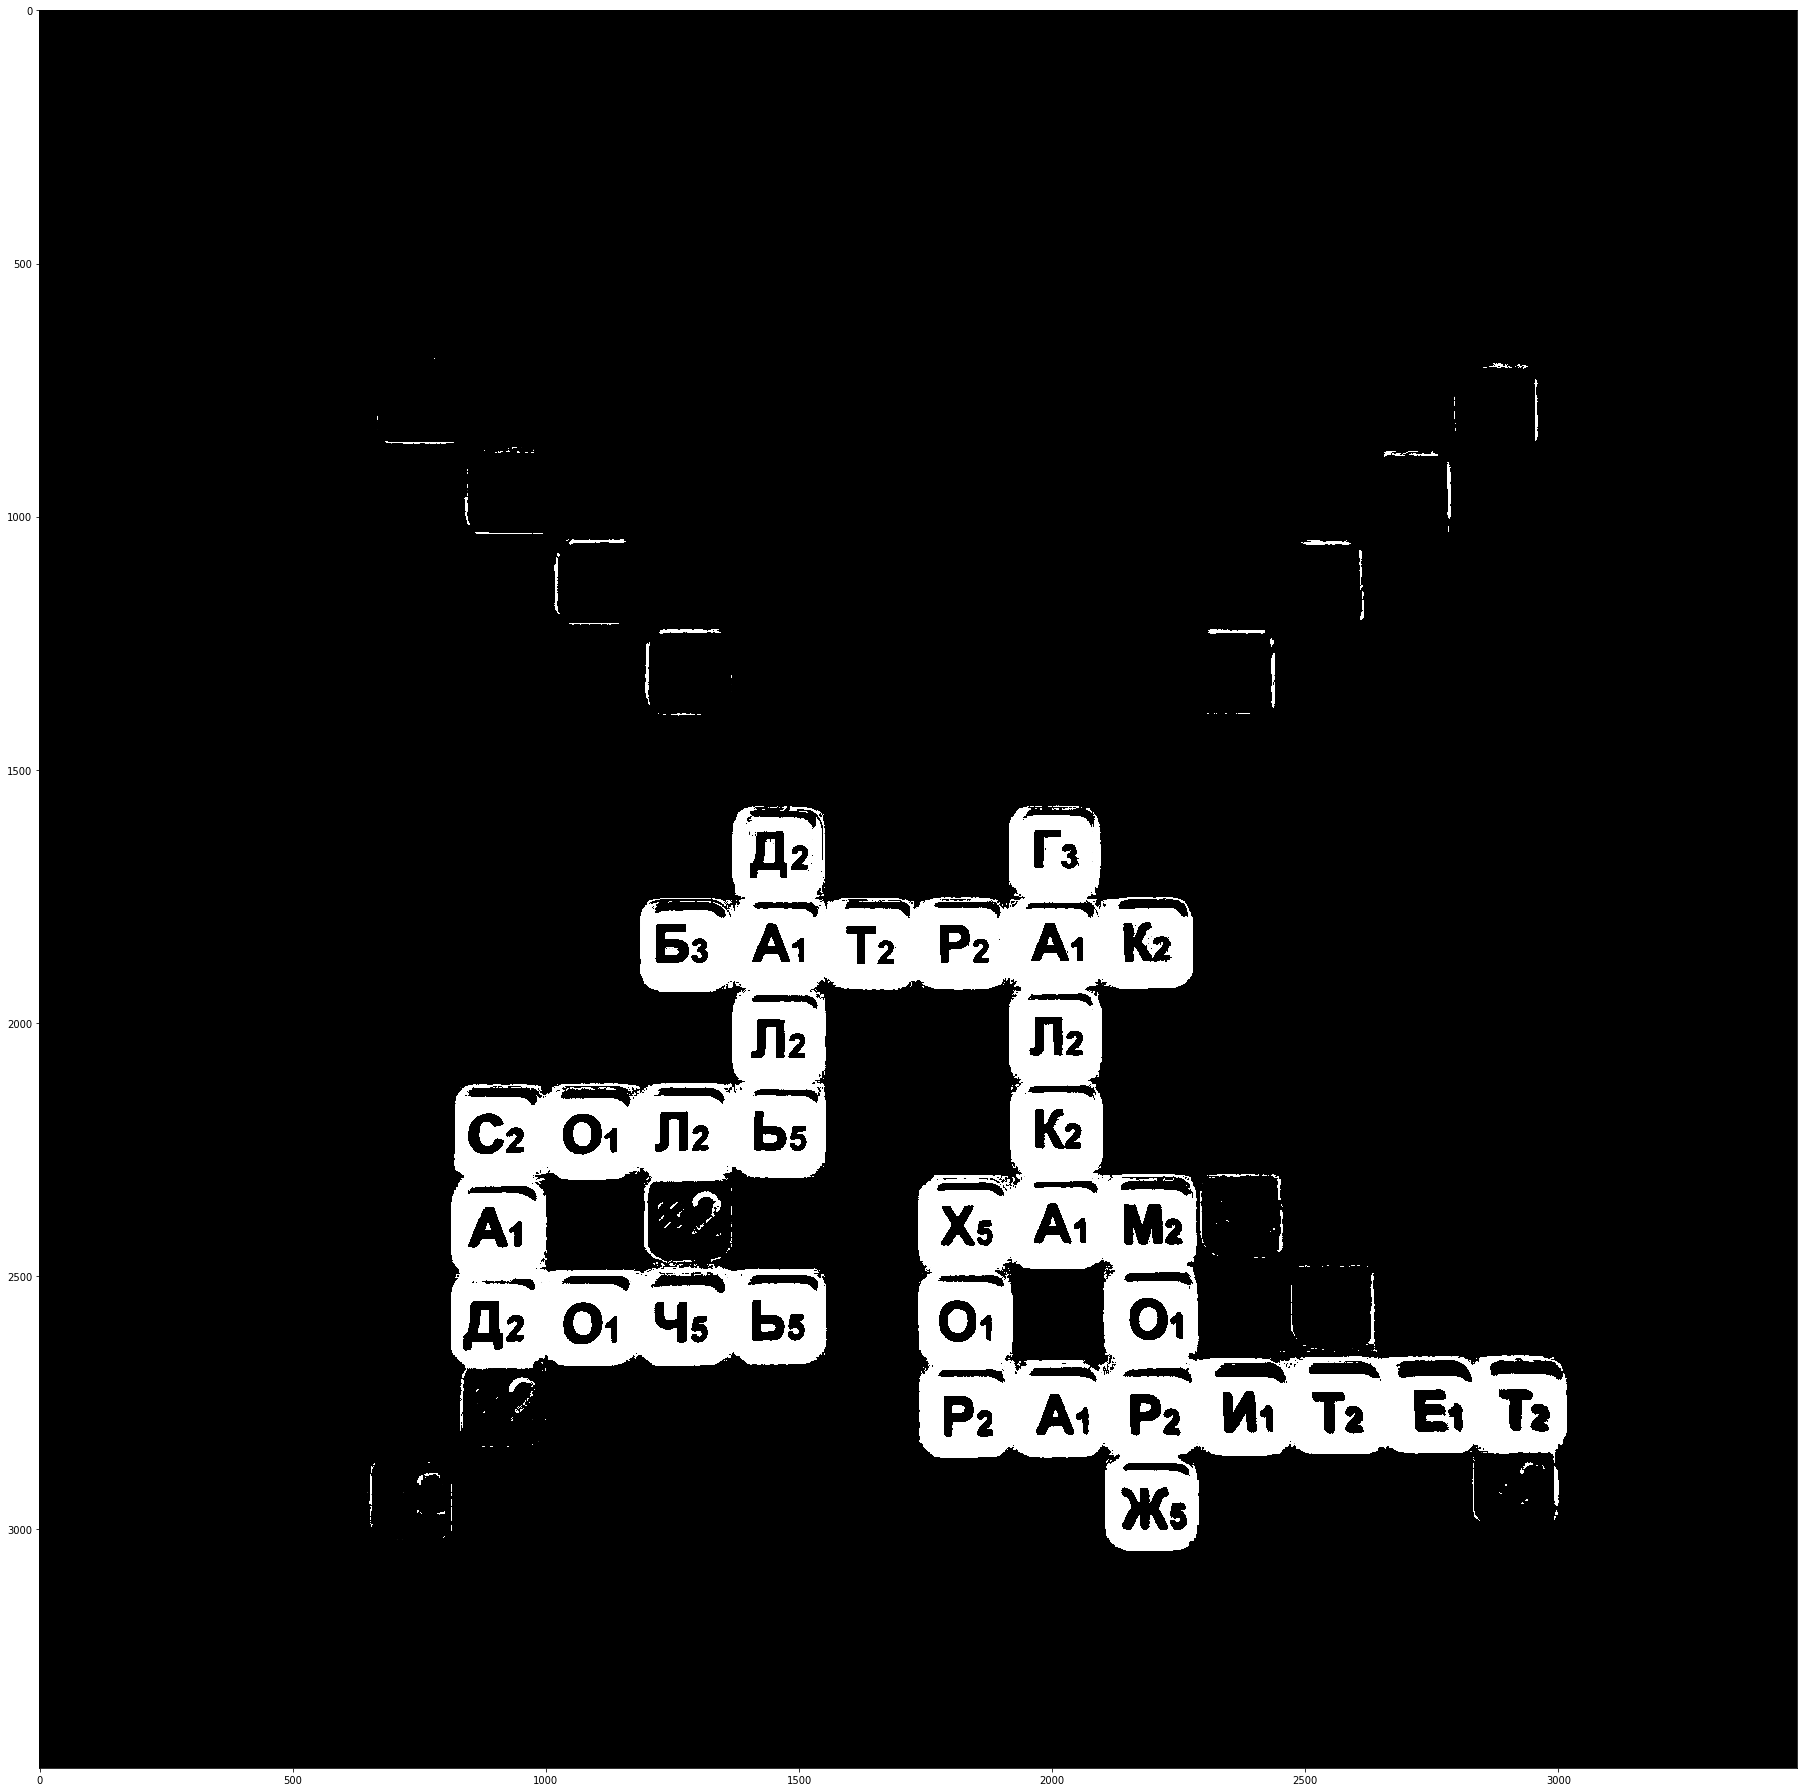

In [12]:
imshow(denoise_nl_means(img_cus))

In [14]:
def ScrambleImage( fname ):
    mgdata = imageio.imread( fname, as_gray=True)
    sdata = mgdata + 0
    np.random.shuffle( sdata )
    dists = np.sqrt(((mgdata[0]-sdata).sum(1)))
    seedrow = (dists==0).nonzero()[0]
    return sdata, seedrow

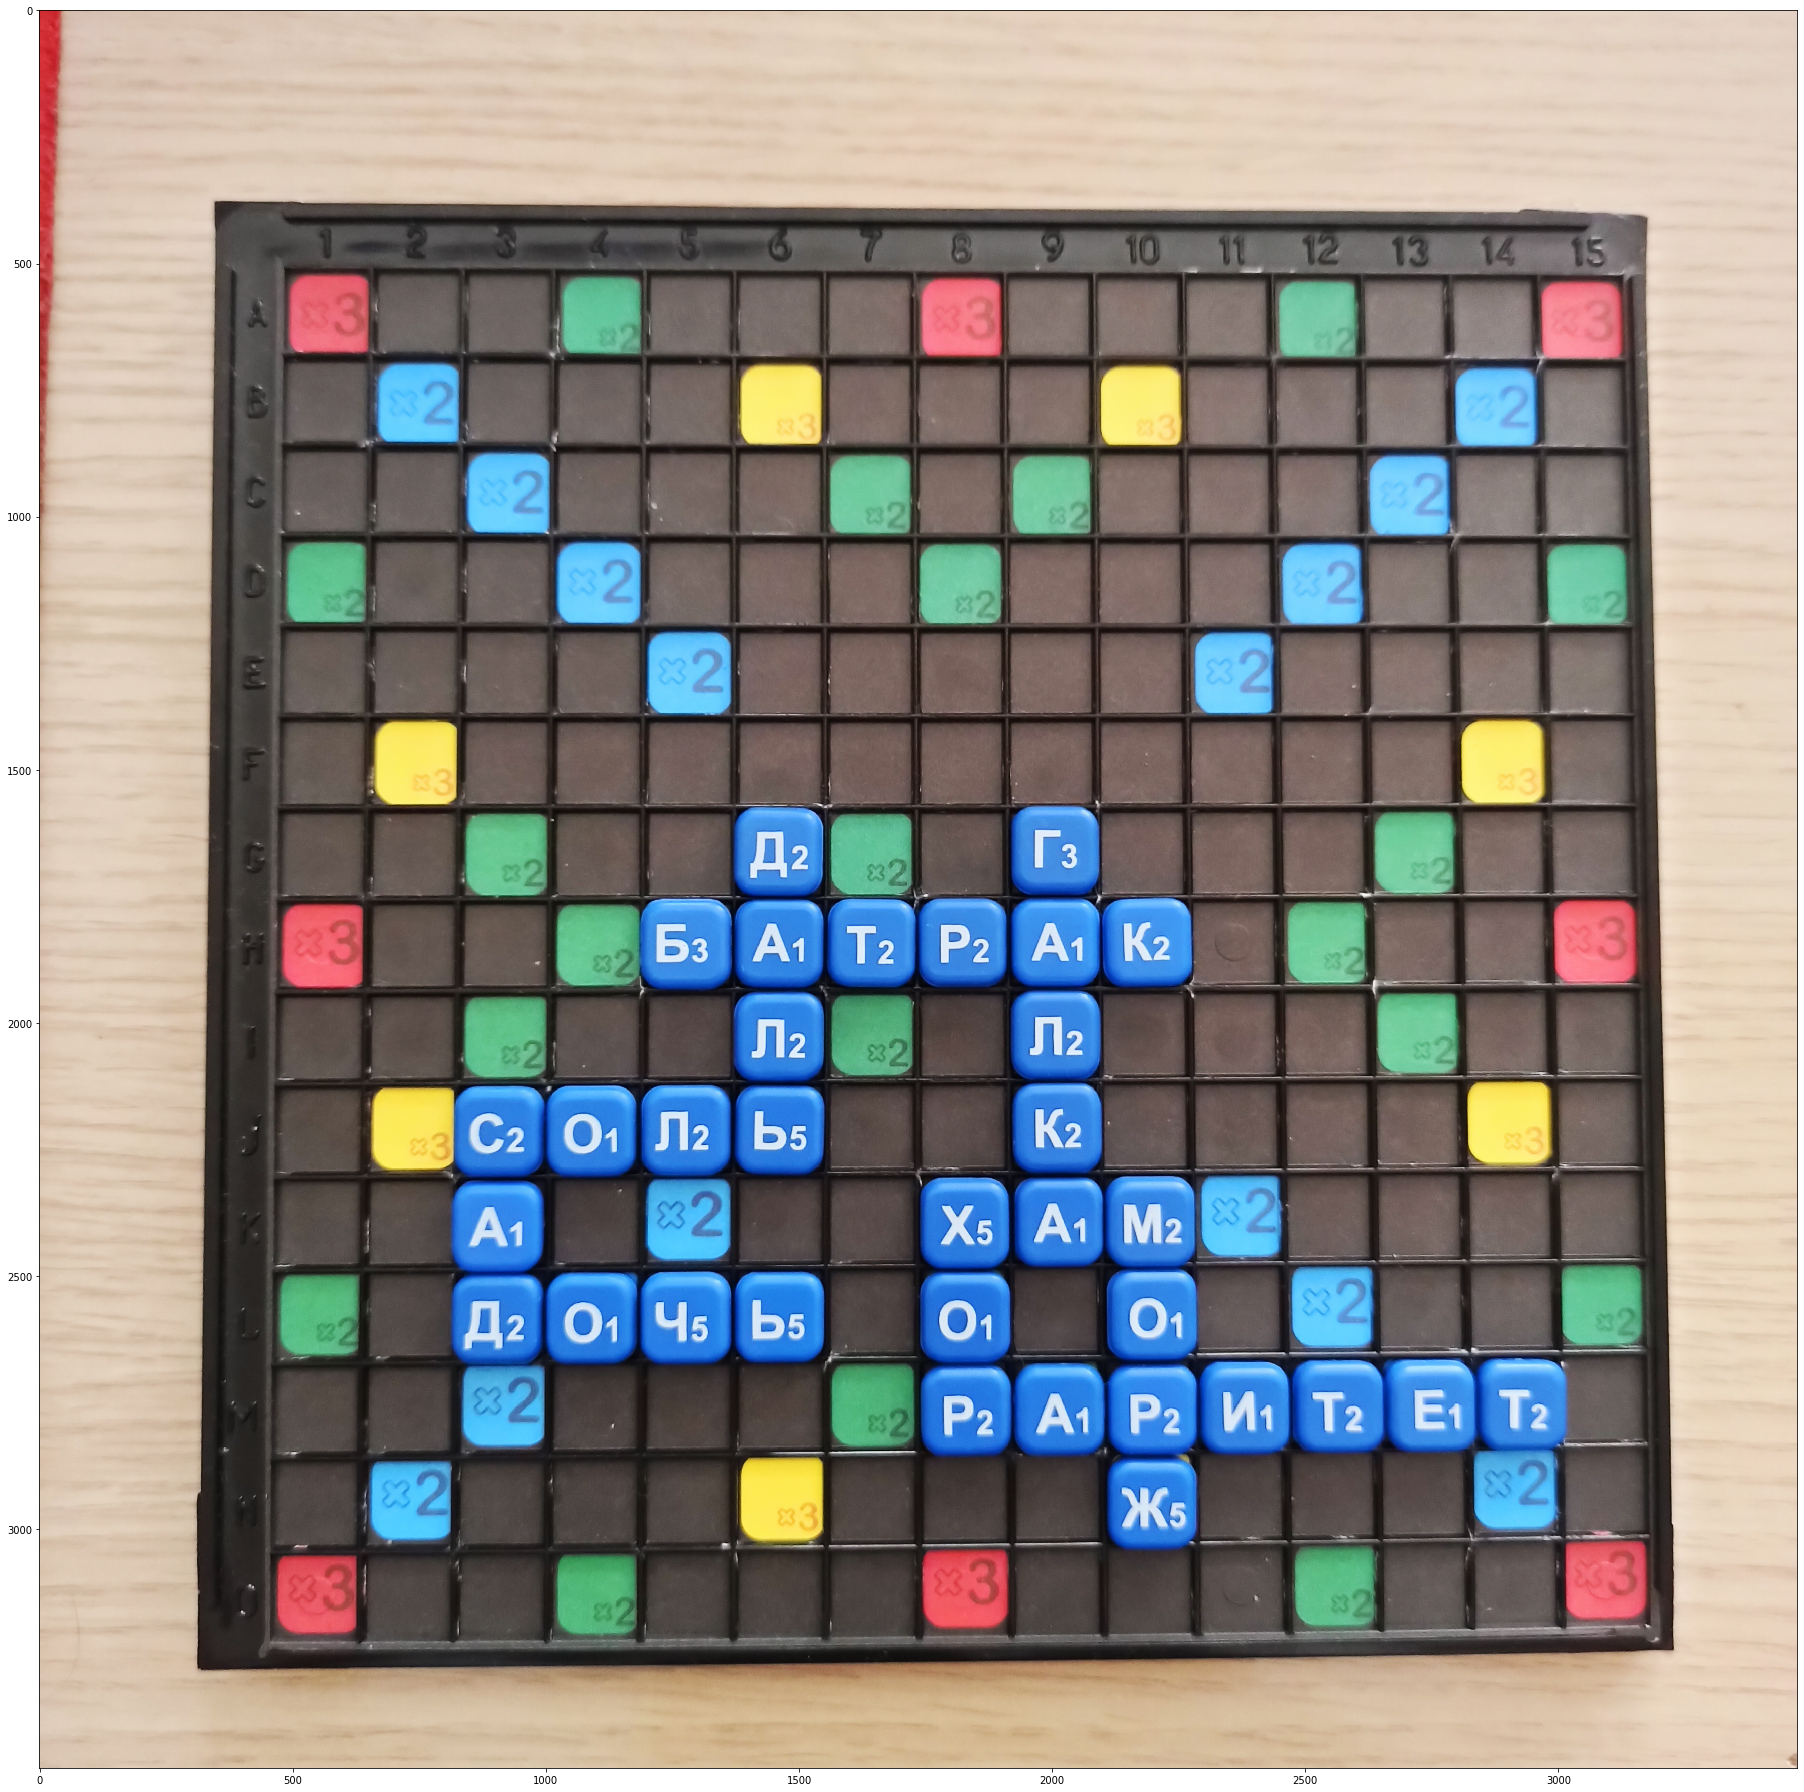

In [3]:
imshow(img)

In [ ]:
imshow(denoise_nl_means(img, patch_size=3))

In [14]:
imshow(threshold_local(img, block_size=3))

ValueError: The parameter `image` must be a 2-dimensional array

In [20]:
threshold_isodata(img)

140

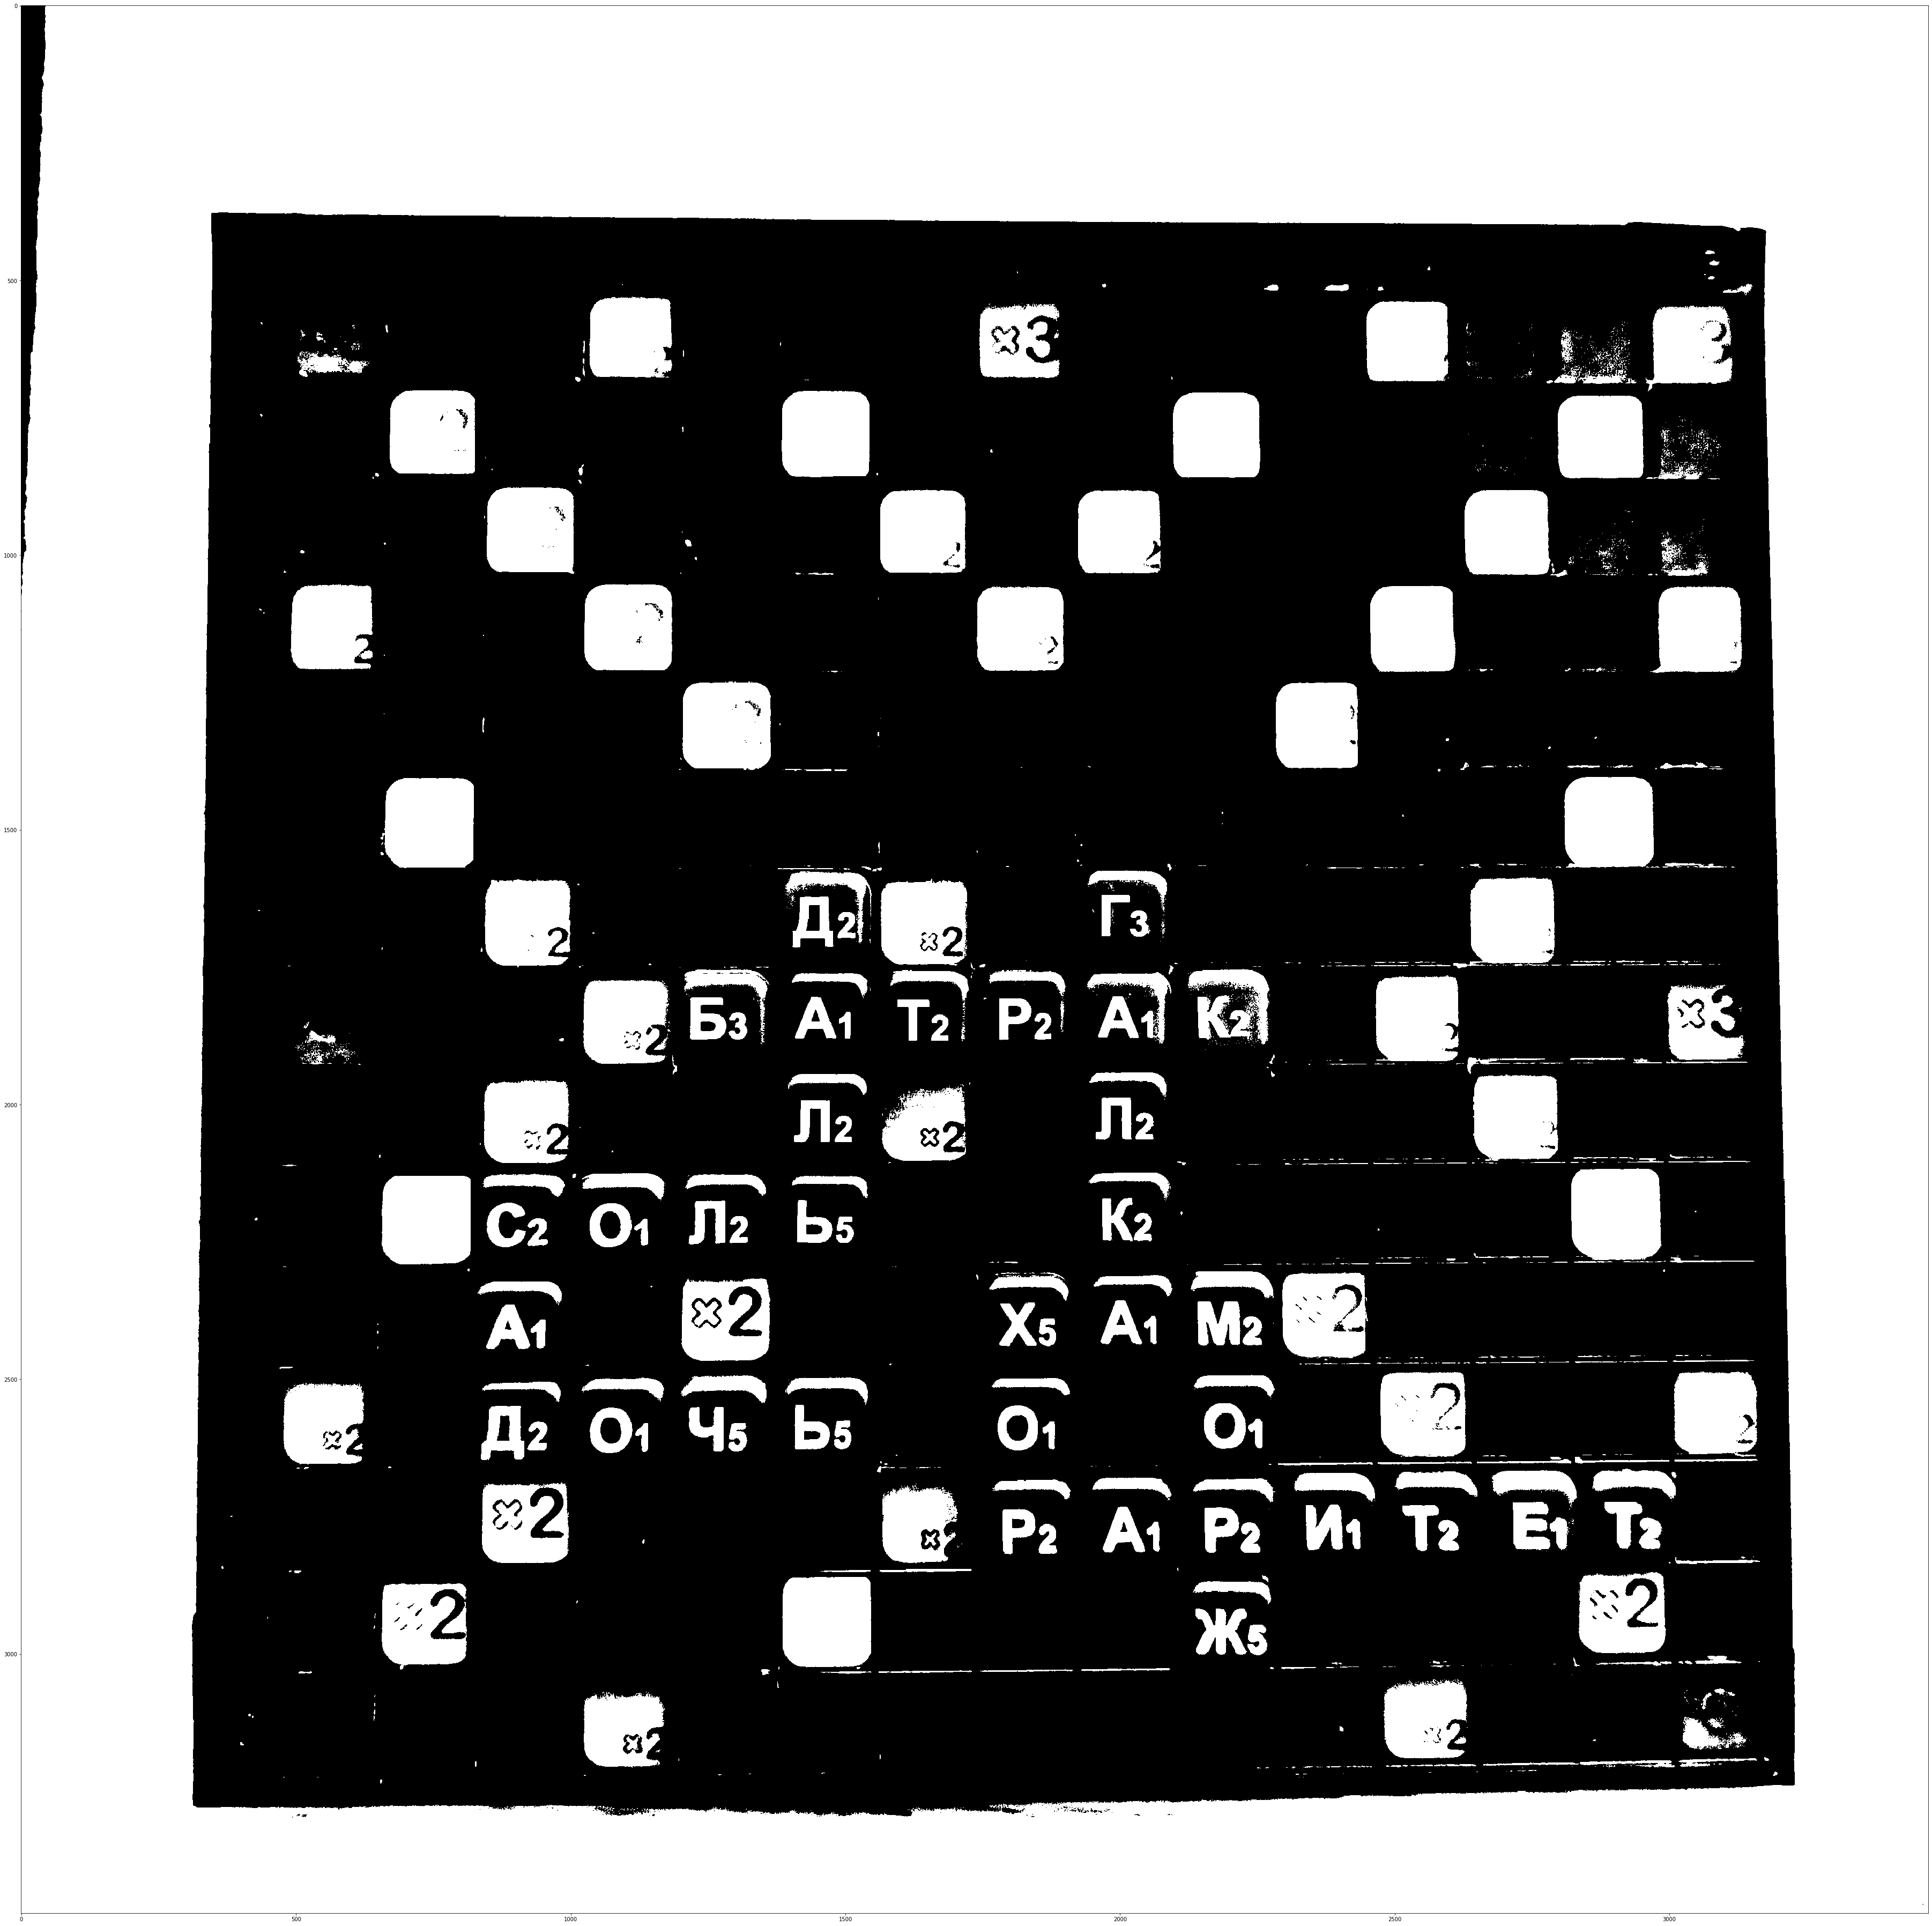

In [27]:
imshow(img_as_ubyte(rgb2gray(img)) > 140)